<a href="https://colab.research.google.com/github/harshita-28/Machine-Learning-Projects/blob/main/Clustering_IrisFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

 
#importing our iris flowers dataset
df = pd.read_csv("Iris_Flowers.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [ ]:
#finding dimensions of dataset

print("Iris_Flowers dataset dimensions: {}".format(dataset.shape))

Iris_Flowers dataset dimensions: (150, 5)


In [ ]:
#finding any null or missing points within dataset

dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
df['class'].unique()

array(['iris_setosa', 'iris_versicolor', 'iris_virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_unlabeled = df.drop(['class'], axis=1)
encoder = LabelEncoder()
encoded_classifications = encoder.fit_transform(df.iloc[:,4:])
print(encoded_classifications)
df_unlabeled

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


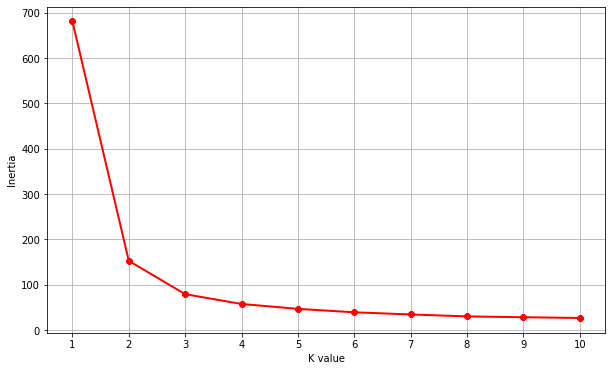

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
wcss_k = []
wcss_ac = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,
                  init='k-means++')
  kmeans.fit(df_unlabeled)
  wcss_k.append(kmeans.inertia_)
  
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss_k, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=3,
                init='k-means++')
clusters = kmeans.fit_predict(df_unlabeled)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
from sklearn.metrics import adjusted_rand_score
print('K Means score: {}'.format(adjusted_rand_score(encoded_classifications, clusters)))

K Means score: 0.7302382722834697


In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters_ac = agglomerative.fit_predict(df_unlabeled)
print('Agglomerative Clustering score: {}'.format(adjusted_rand_score(encoded_classifications, clusters_ac)))

Agglomerative Clustering score: 0.7311985567707745
